In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Perceptron Implementation

In [2]:
def get_data():

    w = np.array([-0.5, 0.5])
    b = 0.1
    X = np.random.random((300, 2))*2 - 1
    Y = np.sign(X.dot(w) + b)
    return X, Y

- Perceptron은 linear classifier이다.

In [3]:
class Perceptron:
    def fit(self, X, Y, learning_rate=1.0, epochs= 1000):
        D = X.shape[1]
        self.w = np.random.randn(D)
        self.b = 0

        N = len(Y)
        costs = []

        for epoch in range(epochs):
            Yhat = self.predict(X)
            incorrect = np.nonzero(Y != Yhat)[0]
            if len(incorrect) == 0:
                break
            
            # weight update for misclassified samples - w = a+ w*y*x
            i = np.random.choice(incorrect)
            self.w += learning_rate * Y[i] * X[i]
            self.b += learning_rate * Y[i]

            c = len(incorrect) / float(N)
            costs.append(c)

        print("final w: ", self.w, "final b: ", self.b , "epoch: ", (epoch + 1), "/", epochs)
        plt.plot(costs)
        plt.show()

    def predict(self, X):
        return np.sign(X.dot(self.w) + self.b)

    def score(self, X, Y):
        P = self.predict(X)
        
        return np.mean(P == Y)

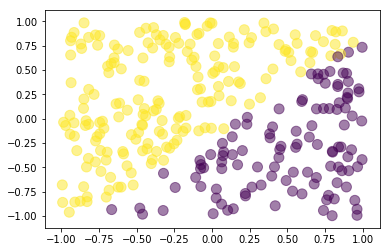

In [4]:
X, Y = get_data()
plt.scatter(X[:, 0], X[:, 1], c=Y, s=100, alpha=0.5)
plt.show()

final w:  [-9.307295    8.89590101] final b:  2.0 epoch:  209 / 1000


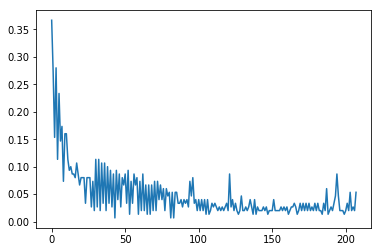

Training time:  0:00:00.185150
Train accuracy:  1.0
Time to compute train accuracy:  0:00:00.002187 Train size:  150
Test accuracy:  0.9866666666666667
Time to compute test accuracy:  0:00:00.001444 Test size:  150


In [5]:
Ntrain = int(len(Y) / 2)
Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
Xtest, Ytest = X[Ntrain:], Y[Ntrain:]

model = Perceptron()
t0 = datetime.now()
model.fit(Xtrain, Ytrain)
print("Training time: ", (datetime.now() - t0))

t0 = datetime.now()
print("Train accuracy: ", model.score(Xtrain, Ytrain))
print("Time to compute train accuracy: ", (datetime.now() - t0), "Train size: ", len(Xtrain))

t0 = datetime.now()
print("Test accuracy: ", model.score(Xtest, Ytest))
print("Time to compute test accuracy: ", (datetime.now() - t0), "Test size: ", len(Xtest))


# 2. XOR and MNIST

### 1. MNIST

In [23]:
import pandas as pd

In [24]:
def get_mnist(limit=None):
    df = pd.read_csv('./mnist_train.csv')
    data = df.as_matrix()
    np.random.shuffle(data)
    
    X = data[:, 1:] / 255.0
    Y = data[:, 0]
    
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y

In [25]:
X, Y = get_mnist()

final w:  [ 0.4746766  -1.33571197 -0.02570308 -0.51626978  0.02672633  1.22976098
 -0.85088853 -1.0550411   0.09950087  0.54411918 -0.1794693   0.46040106
 -1.43672258 -1.46296166  0.41103472 -0.23579501 -0.54712422  0.30092712
 -0.68196655  1.21616969  1.48048477 -0.92099953 -1.65915547 -0.85778767
  0.09864635  0.89809417  0.61196969 -0.34361184 -1.36213277  1.59709167
 -0.37523493 -0.58368283 -0.13163171 -0.919973   -0.86673563 -2.73101362
  0.91916659  0.02551702  1.49529595 -0.05836047  0.54626305 -1.40466385
  0.9676162  -0.37585471  1.61942461  0.56370158  1.95934517  0.36669324
  1.28948867  0.30709759 -0.65904221  0.77519004 -0.13754019 -0.7231758
 -0.88596892  0.88805606 -0.43213159  0.15420699 -1.42195066 -1.87155367
 -1.30031491  0.15165994  2.09131063 -0.18335863 -1.64044093  0.67573001
 -0.24133587 -0.17580928 -0.36934576 -0.26425828 -0.04823787 -1.24778553
 -0.61694762  0.19269807  1.3804798   0.58891174  0.21771901  0.78860703
  0.58120212 -1.26764173 -0.80406963  1.14

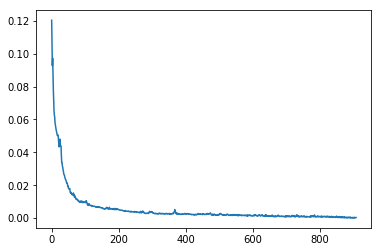

MNIST train accuracy: 1.0


In [26]:
idx = np.logical_or(Y == 0, Y == 1)
X = X[idx]
Y = Y[idx]
Y[Y == 0] = -1
model = Perceptron()
t0 = datetime.now()
model.fit(X, Y, learning_rate=1e-2)
print("MNIST train accuracy:", model.score(X, Y))

### 2. XOR

In [14]:
def get_simple_xor():
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([0, 1, 1, 0])
    return X, Y

final w:  [0.03939417 0.43990768] final b:  1.0 epoch:  1000 / 1000


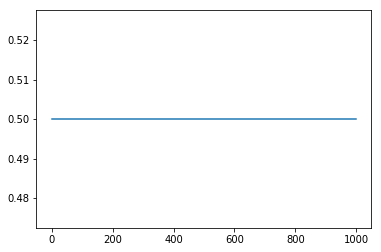

XOR accuracy:  0.5


In [17]:
model = Perceptron()

X, Y = get_simple_xor()
model.fit(X, Y)
print("XOR accuracy: ", model.score(X, Y))